In [1]:
from calendar import c
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from kmeans import Kmeans


Define method to find the elbow of the cost function and to find the best clustering based on the same function

In [2]:
def elbowMethod(dataset, maxClusters, maxIterations, verbose = False):
    costs = []
    for nCen in range(1, maxClusters):
        print("Calculating elbow for kClusters:", nCen)
        clustering, cost = findBestClusering(dataset, nCen, maxIterations, verbose=verbose)
        costs.append(cost)
    plt.plot(np.arange(1, maxClusters), np.array(costs))
    plt.xlabel("K clusters")
    plt.ylabel("Cost function")
    plt.title("Elbow method")
    

def findBestClusering(dataset, kClusters, maxIterations, verbose = True):
    bestClustering = []
    bestCost = float("inf")
    for i in range(maxIterations):
        cl = Kmeans(dataset, kClusters)
        clusters, currCost = cl.clusterize()
        if verbose:
            print("Curr cost:", currCost)
            cl.calcExtValidation()
        if currCost < bestCost:
            bestCost = currCost
            bestClustering = cl
    return bestClustering, bestCost

Prepare the dataset

In [3]:
dataset = pd.read_csv("data/iris.csv")

Find best K-means clustering with k = 3 and 10 iterations max

In [4]:
cl, cost = findBestClusering(dataset, 3, 20, verbose=False)
print("Lowest cost is:", cost)

Lowest cost is: 0.9727333333333329


Validate the results

Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[50 37 63]
Clusters     0   1   2
Labels                
Setosa      50   0   0
Versicolor   0  30  20
Virginica    0   7  43
Cluster 0 : Setosa
Cluster 1 : Versicolor
Cluster 2 : Virginica

Incorrectly clustered instances: 27
Purity: 0.82
Accuracy: 0.8236241610738255
Precision: 0.7216441207075962
Recall: 0.7548299319727891
F score: 0.7378640776699029
For k clusters = 3 The average silhouette_score is : 0.4847294778770669
[Pandas(_0=5.1, _1=3.5, _2=1.4, _3=0.2), Pandas(_0=5.5, _1=2.3, _2=4.0, _3=1.3), Pandas(_0=7.0, _1=3.2, _2=4.7, _3=1.4)]


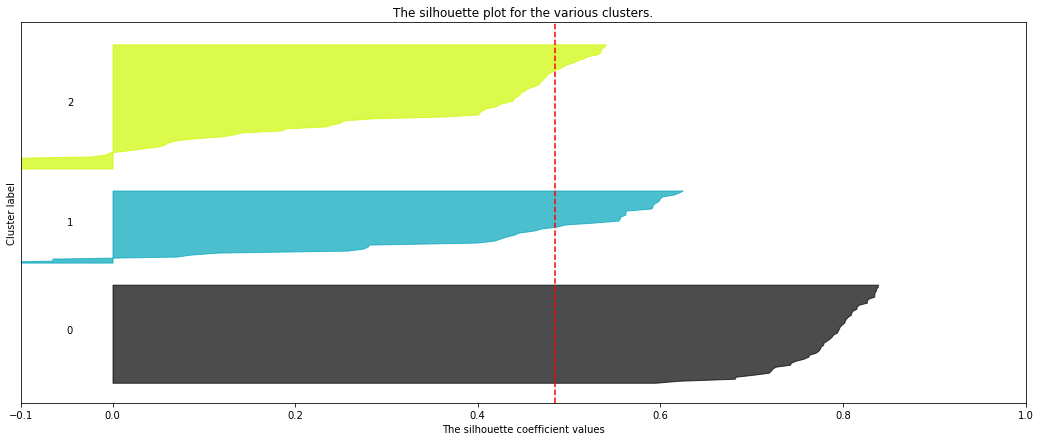

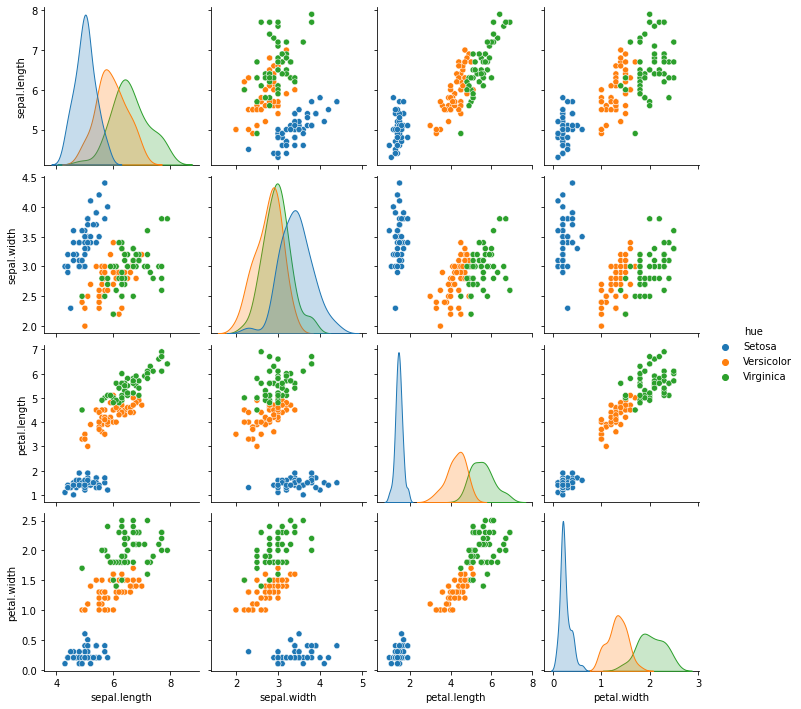

In [5]:
cl.calcExtValidation()
cl.calcPlotSilhouete()
cl.plotScatter()
print(cl.centroids)

Find best K with Elbow method

Calculating elbow for kClusters: 1
Calculating elbow for kClusters: 2
Calculating elbow for kClusters: 3
Calculating elbow for kClusters: 4
Calculating elbow for kClusters: 5


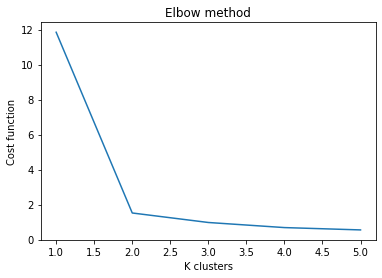

In [6]:
elbowMethod(dataset, 6, 10)

Try different k and print the silhouette

Curr cost: 11.849800000000007
Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[150]
Clusters     0
Labels        
Setosa      50
Versicolor  50
Virginica   50
Cluster 0 : Setosa
Cluster 0 : Versicolor
Cluster 0 : Virginica

Incorrectly clustered instances: 0
Purity: 1.0
Accuracy: 0.3288590604026846
Precision: 0.3288590604026846
Recall: 1.0
F score: 0.494949494949495
Curr cost: 11.849800000000007
Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[150]
Clusters     0
Labels        
Setosa      50
Versicolor  50
Virginica   50
Cluster 0 : Setosa
Cluster 0 : Versicolor
Cluster 0 : Virginica

Incorrectly clustered instances: 0
Purity: 1.0
Accuracy: 0.3288590604026846
Precision: 0.3288590604026846
Recall: 1.0
F score: 0.494949494949495
Curr cost: 11.849800000000007
Counter({'Setosa': 50, 'Versicolor': 50, 'Virginica': 50})
[150]
Clusters     0
Labels        
Setosa      50
Versicolor  50
Virginica   50
Cluster 0 : Setosa
Cluster 0 : Versicolor
Cluster 0 : Virginica

Incor

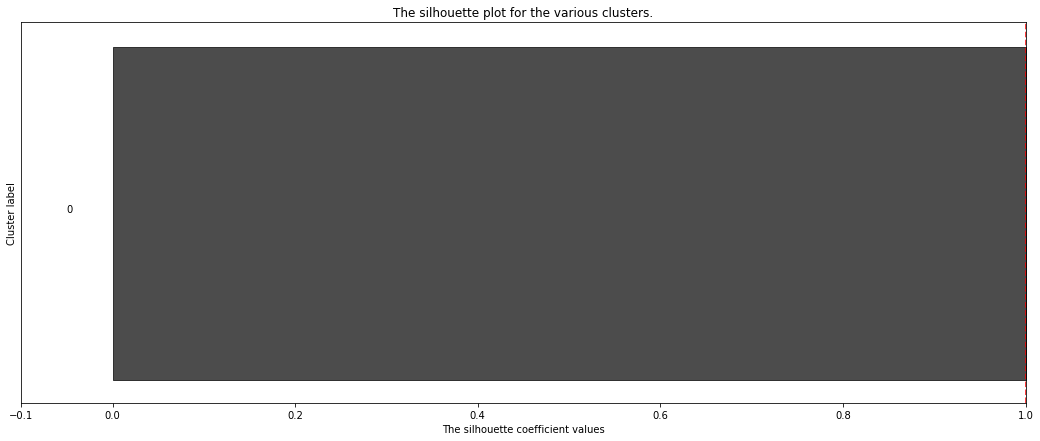

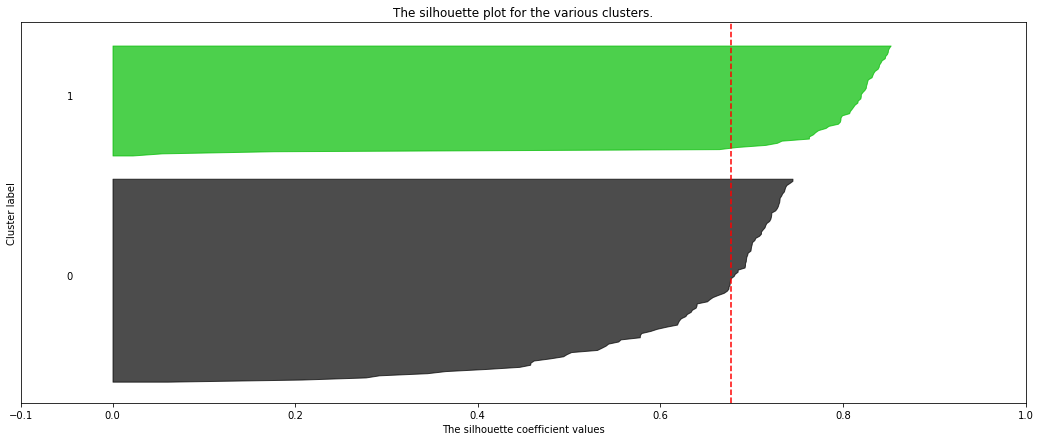

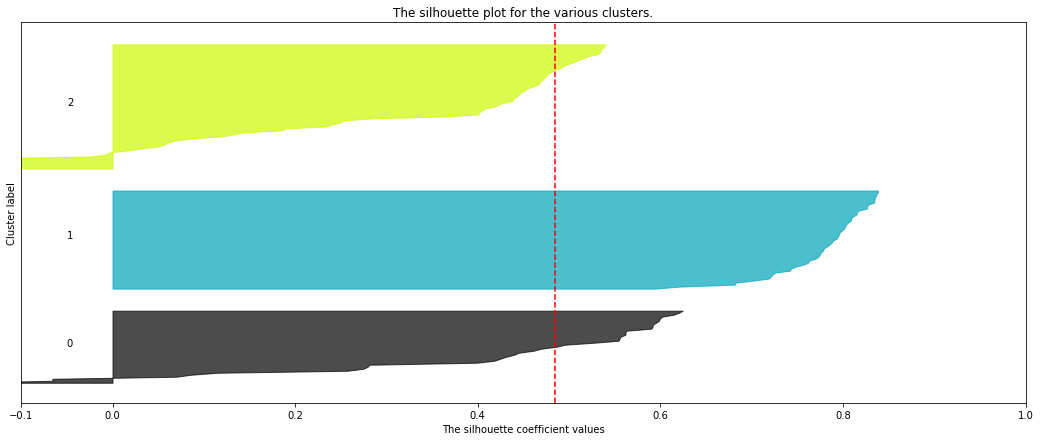

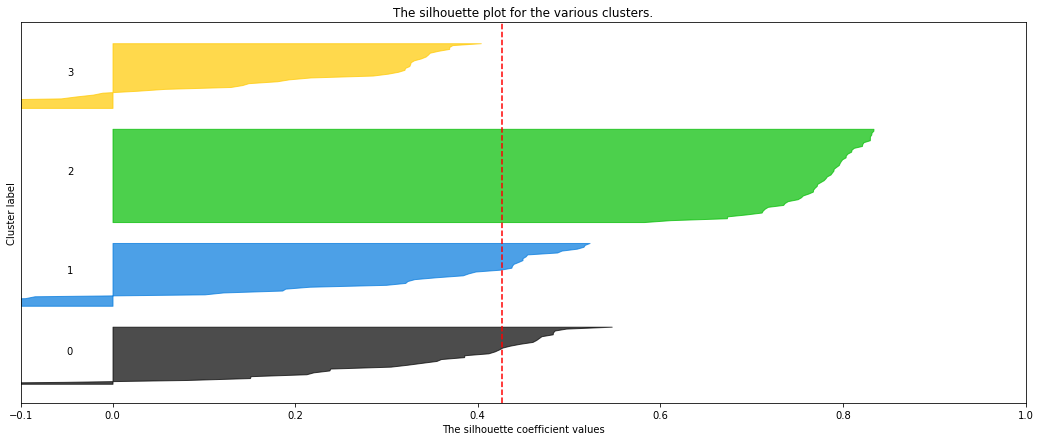

In [7]:
for i in range(1, 5):
    cl, cost = findBestClusering(dataset, i, 10)
    print("Lowest cost is:", cost)
    cl.calcPlotSilhouete()
    